# EMAIL SPAM - ML

## Objective
- Email spam classification is a common problem in natural language processing (NLP) and machine learning. The objective of this project is to build a machine learning model that can accurately classify emails into two categories: "spam" or "not spam" .

## Dataset Description
- **Title** : The subject or title of the email.

- **Text** : The body or content of the email.

- **Type** : The target variable indicating whether the email is "spam" or "not spam."

## Step
- Import Libraries
- Read Data
- Data Preprocessing
- Feature Engineering
- Model Training

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read train data

In [2]:
data=pd.read_csv('files/train/raw/train.csv')

In [3]:
data

,title,text,type
0,try out our high-quality rides for less! ?,Here’s 10% OFF your next 10 Bolt rides\n\nYou ...,spam
1,New login to Instagram from Threads on Infinix...,"We noticed a new login, alexxuzy\n \nWe notice...",not spam
2,TV LISENCE,Dear Sir/ Madam\n\nI have been receiving sms f...,not spam
3,Do you have $7 Walid?,"Hello Walid,\n\nDo you have $7?\n\nI ask becau...",spam
4,Combating scams in the Discogs Marketplace,Discogs has recently detected an increase in s...,spam
5,New jobs posted from Plan International,You are receiving this email because you joine...,not spam
6,Come back and keep earning with Quick Pay Survey,Quick Pay Survey® \n \n \n \n \nHello Anggr...,not spam
7,Get ready for Test [Co-Deo],"Hello Sathya,\n\nYou have been invited to part...",not spam
8,AFE Model Casting Call,Model Casting Call\nThank you for taking the t...,not spam
9,"Walid, Get Paid to Listen to Music","Hi Walid,\n\nDo you listen to music on Spotify...",spam


## Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   58 non-null     object
 1   text    58 non-null     object
 2   type    58 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [5]:
data.isnull().sum()

title    0
text     0
type     0
dtype: int64

In [6]:
data.isna().sum()

title    0
text     0
type     0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates()

,title,text,type
0,try out our high-quality rides for less! ?,Here’s 10% OFF your next 10 Bolt rides\n\nYou ...,spam
1,New login to Instagram from Threads on Infinix...,"We noticed a new login, alexxuzy\n \nWe notice...",not spam
2,TV LISENCE,Dear Sir/ Madam\n\nI have been receiving sms f...,not spam
3,Do you have $7 Walid?,"Hello Walid,\n\nDo you have $7?\n\nI ask becau...",spam
4,Combating scams in the Discogs Marketplace,Discogs has recently detected an increase in s...,spam
5,New jobs posted from Plan International,You are receiving this email because you joine...,not spam
6,Come back and keep earning with Quick Pay Survey,Quick Pay Survey® \n \n \n \n \nHello Anggr...,not spam
7,Get ready for Test [Co-Deo],"Hello Sathya,\n\nYou have been invited to part...",not spam
8,AFE Model Casting Call,Model Casting Call\nThank you for taking the t...,not spam
9,"Walid, Get Paid to Listen to Music","Hi Walid,\n\nDo you listen to music on Spotify...",spam


In [9]:
data.nunique()

title    54
text     57
type      2
dtype: int64

## Feature Engineering

In [10]:
df=data.copy()
x=df.drop('type',axis=1).copy()
y=df['type'].copy()

## Splitting Datas

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=123)

In [12]:
x_train.to_csv('files/train/raw/x_train.csv',index=False)
y_train.to_csv('files/train/raw/y_train.csv',index=False)

x_test.to_csv('files/evaluate/raw/x_test.csv',index=False)
y_test.to_csv('files/evaluate/raw/y_test.csv',index=False)

## Feature Encoding

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
encoder=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
x_encode=encoder.fit(x_train)
import joblib as jb
jb.dump(x_encode,'files/train/model/train_encode_model.pkl')
x_encode=encoder.transform(x_train)
x_train=pd.DataFrame(x_encode,columns=x_train.columns)

In [15]:
x_train

,title,text
0,36.0,22.0
1,16.0,10.0
2,33.0,32.0
3,18.0,36.0
4,19.0,38.0
5,8.0,33.0
6,22.0,29.0
7,30.0,7.0
8,25.0,18.0
9,12.0,20.0


In [16]:
x_train.to_csv('files/train/processed/train_processed.csv')

In [17]:
#encoding y
y_train=y_train.replace({'spam':0,'not spam':1})
y_train

12    1
49    1
48    1
21    1
1     1
6     1
39    1
40    0
46    0
7     1
53    1
29    1
24    1
15    0
54    1
35    0
20    1
56    1
3     0
4     0
16    1
44    1
36    0
14    1
51    1
25    1
57    1
47    1
9     0
32    0
33    1
22    1
42    1
19    0
17    1
38    0
34    0
28    0
2     1
45    1
Name: type, dtype: int64

In [18]:
encoder=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
x_encode=encoder.fit(x_test)
import joblib as jb
jb.dump(x_encode,'files/evaluate/model/test_encode_model.pkl')
x_encode=encoder.transform(x_test)
x_test=pd.DataFrame(x_encode,columns=x_test.columns)
x_test

,title,text
0,5.0,14.0
1,16.0,1.0
2,3.0,6.0
3,7.0,2.0
4,6.0,5.0
5,9.0,12.0
6,15.0,0.0
7,12.0,3.0
8,1.0,13.0
9,11.0,15.0


In [19]:
x_test.to_csv('files/evaluate/processed/test_processed.csv')

In [20]:
y_test=y_test.replace({'spam':0,'not spam':1})

In [21]:
y_test

50    0
41    1
13    1
52    1
27    0
26    0
55    0
37    0
18    1
23    0
31    1
30    0
11    1
0     0
5     1
10    1
43    1
8     1
Name: type, dtype: int64

## Feature Selection

In [22]:
from sklearn.feature_selection import SelectKBest, chi2

In [23]:
bestfeatures=SelectKBest(score_func=chi2,k='all')
fit=bestfeatures.fit(x_train,y_train)

In [24]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
#concat two data frames
featurescore=pd.concat([dfcolumns,dfscores],axis=1)
featurescore.columns=['specs','score']
print(featurescore)

   specs      score
0  title  11.058514
1   text   5.798817


In [25]:
feature=featurescore
feature

,specs,score
0,title,11.058514
1,text,5.798817


In [26]:
feature_list=feature['specs'].to_list()

In [27]:
jb.dump(feature_list,'files/train/model/feature_selected.pkl')

['files/train/model/feature_selected.pkl']

In [28]:
feature_selected=x_train[feature_list]
feature_selected

,title,text
0,36.0,22.0
1,16.0,10.0
2,33.0,32.0
3,18.0,36.0
4,19.0,38.0
5,8.0,33.0
6,22.0,29.0
7,30.0,7.0
8,25.0,18.0
9,12.0,20.0


In [29]:
feature_selected.to_csv('files/train/processed/feature_selected_s_train.csv',index=False)

## Model Training

In [30]:
import xgboost as xgb

In [31]:
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)
print('Train Score :',xgb.score(x_train,y_train)*100)

Train Score : 97.5


In [32]:
jb.dump(xgb,'files/train/model/xgb.pkl')

['files/train/model/xgb.pkl']

## Prediction

In [33]:
model=jb.load('files/train/model/xgb.pkl')
feature_selection=jb.load('files/train/model/feature_selected.pkl')

In [34]:
feature_selected=x_test[feature_selection]
feature_selected

,title,text
0,5.0,14.0
1,16.0,1.0
2,3.0,6.0
3,7.0,2.0
4,6.0,5.0
5,9.0,12.0
6,15.0,0.0
7,12.0,3.0
8,1.0,13.0
9,11.0,15.0


In [35]:
y_pred=pd.DataFrame(model.predict(feature_selected))
y_pred

,0
0,1
1,0
2,1
3,1
4,1
5,1
6,0
7,0
8,1
9,0


In [36]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [37]:
print(classification_report(y_pred,y_test))
cm=confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.70      0.64      0.67        11

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.62      0.61      0.61        18



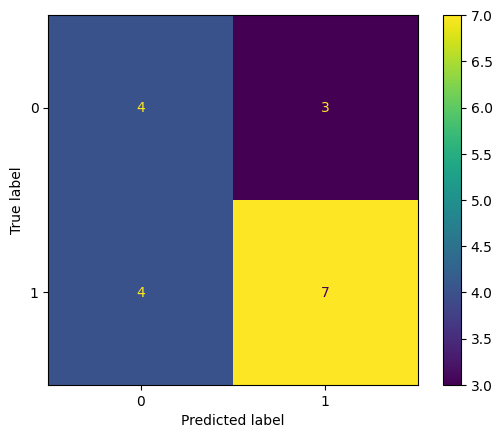

In [38]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [39]:
y_pred=y_pred.replace({0:'spam',1:'not spam'})

In [40]:
y_pred

,0
0,not spam
1,spam
2,not spam
3,not spam
4,not spam
5,not spam
6,spam
7,spam
8,not spam
9,spam


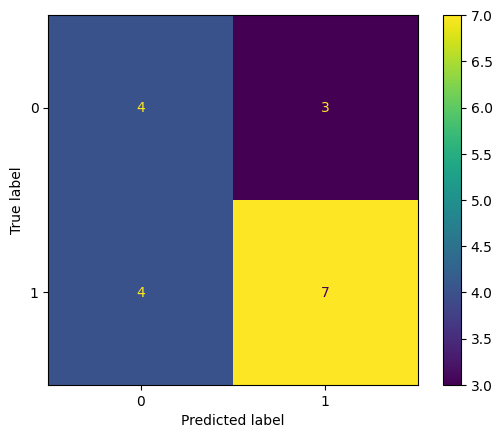

In [41]:
disp.plot()